In [704]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings("ignore")




In [705]:

df=pd.read_csv('training_set_features.csv')
df.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [706]:
df.shape

(26707, 36)

In [707]:
df.columns

Index(['respondent_id', 'h1n1_concern', 'h1n1_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation'],
      dtype='object')

H1N1 & Seasonal Flu Column Description

h1n1_concern - Level of concern about the H1N1 flu.
0 = Not at all concerned; 1 = Not very concerned; 2 = Somewhat concerned; 3 = Very concerned.
h1n1_knowledge - Level of knowledge about H1N1 flu.
0 = No knowledge; 1 = A little knowledge; 2 = A lot of knowledge.
behavioral_antiviral_meds - Has taken antiviral medications. (binary)
behavioral_avoidance - Has avoided close contact with others with flu-like symptoms. (binary)
behavioral_face_mask - Has bought a face mask. (binary)
behavioral_wash_hands - Has frequently washed hands or used hand sanitizer. (binary)
behavioral_large_gatherings - Has reduced time at large gatherings. (binary)
behavioral_outside_home - Has reduced contact with people outside of own household. (binary)
behavioral_touch_face - Has avoided touching eyes, nose, or mouth. (binary)
doctor_recc_h1n1 - H1N1 flu vaccine was recommended by doctor. (binary)
doctor_recc_seasonal - Seasonal flu vaccine was recommended by doctor. (binary)
chronic_med_condition - Has any of the following chronic medical conditions: asthma or an other lung condition, diabetes, a heart condition, a kidney condition, sickle cell anemia or other anemia, a neurological or neuromuscular condition, a liver condition, or a weakened immune system caused by a chronic illness or by medicines taken for a chronic illness. (binary)
child_under_6_months - Has regular close contact with a child under the age of six months. (binary)
health_worker - Is a healthcare worker. (binary)
health_insurance - Has health insurance. (binary)
opinion_h1n1_vacc_effective - Respondent's opinion about H1N1 vaccine effectiveness.
1 = Not at all effective; 2 = Not very effective; 3 = Don't know; 4 = Somewhat effective; 5 = Very effective.
opinion_h1n1_risk - Respondent's opinion about risk of getting sick with H1N1 flu without vaccine.
1 = Very Low; 2 = Somewhat low; 3 = Don't know; 4 = Somewhat high; 5 = Very high.
opinion_h1n1_sick_from_vacc - Respondent's worry of getting sick from taking H1N1 vaccine.
1 = Not at all worried; 2 = Not very worried; 3 = Don't know; 4 = Somewhat worried; 5 = Very worried.
opinion_seas_vacc_effective - Respondent's opinion about seasonal flu vaccine effectiveness.
1 = Not at all effective; 2 = Not very effective; 3 = Don't know; 4 = Somewhat effective; 5 = Very effective.
opinion_seas_risk - Respondent's opinion about risk of getting sick with seasonal flu without vaccine.
1 = Very Low; 2 = Somewhat low; 3 = Don't know; 4 = Somewhat high; 5 = Very high.
opinion_seas_sick_from_vacc - Respondent's worry of getting sick from taking seasonal flu vaccine.
1 = Not at all worried; 2 = Not very worried; 3 = Don't know; 4 = Somewhat worried; 5 = Very worried.
age_group - Age group of respondent.
education - Self-reported education level.
race - Race of respondent.
sex - Sex of respondent.
income_poverty - Household annual income of respondent with respect to 2008 Census poverty thresholds.
marital_status - Marital status of respondent.
rent_or_own - Housing situation of respondent.
employment_status - Employment status of respondent.
hhs_geo_region - Respondent's residence using a 10-region geographic classification defined by the U.S. Dept. of Health and Human Services. Values are represented as short random character strings.
census_msa - Respondent's residence within metropolitan statistical areas (MSA) as defined by the U.S. Census.
household_adults - Number of other adults in household, top-coded to 3.
household_children - Number of children in household, top-coded to 3.
employment_industry - Type of industry respondent is employed in. Values are represented as short random character strings.
employment_occupation - Type of occupation of respondent. Values are represented as short random character strings.

In [708]:
df1=pd.read_csv('training_set_labels.csv')
df1.head()

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0


In [709]:
df1.shape

(26707, 3)

In [710]:
df1.columns

Index(['respondent_id', 'h1n1_vaccine', 'seasonal_vaccine'], dtype='object')

In [711]:
#H1N1 Vaccine
df1['h1n1_vaccine'].value_counts()

h1n1_vaccine
0    21033
1     5674
Name: count, dtype: int64

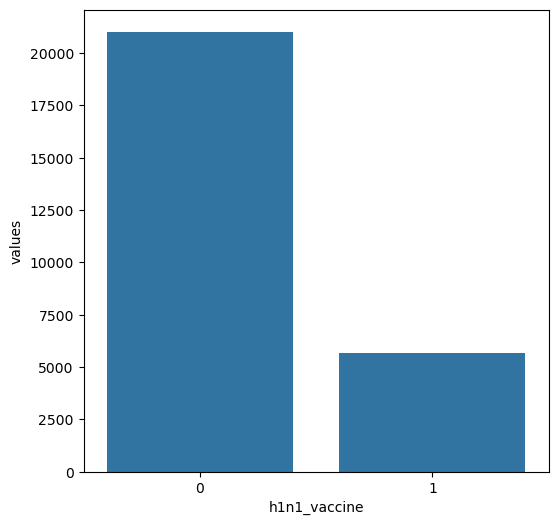

In [712]:
h1n1_vaccine_counts=df1['h1n1_vaccine'].value_counts()
df1h1n1bal=pd.DataFrame({'h1n1_vaccine':h1n1_vaccine_counts.index,'values': h1n1_vaccine_counts.values})

plt.figure(figsize=(6,6))
sns.barplot(x='h1n1_vaccine',y='values',data=df1h1n1bal)
plt.show()

Theres a huge gap between those who received h1n1 vaccine and those that didnt.

In [713]:
#Seasonal flu 
df1['seasonal_vaccine'].value_counts()

seasonal_vaccine
0    14272
1    12435
Name: count, dtype: int64

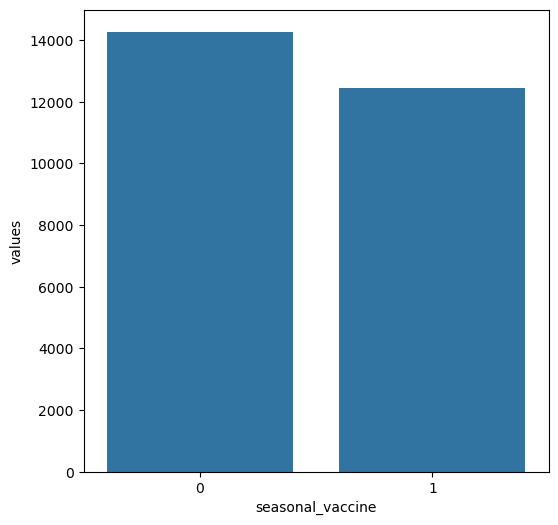

In [714]:
seasonal_vaccine_counts=df1['seasonal_vaccine'].value_counts()
df1h1n1bal=pd.DataFrame({'seasonal_vaccine':seasonal_vaccine_counts.index,'values': seasonal_vaccine_counts.values})

plt.figure(figsize=(6,6))
sns.barplot(x='seasonal_vaccine',y='values',data=df1h1n1bal)
plt.show()

The number of people who received a flu vaccine is nearly as high as the people who didnt.

In [715]:
merged_df= pd.merge(df,df1,on='respondent_id')
merged_df.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


In [716]:
merged_df.describe()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children,h1n1_vaccine,seasonal_vaccine
count,26707.000000,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,...,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000,26707.000000,26707.000000
mean,13353.000000,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,...,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583,0.212454,0.465608
std,7709.791156,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,...,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173,0.409052,0.498825
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,...,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,...,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
75%,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,...,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000,0.000000,1.000000
max,26706.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000,1.000000,1.000000


Data Exploration & Cleaning

In [717]:
#merged_df.isnull().sum()
missing_percentage= merged_df.isnull().sum()*100 /len(merged_df)
missing_percentage_sorted= missing_percentage.sort_values(ascending=False) 
missing_percentage_sorted                                            

employment_occupation          50.436215
employment_industry            49.912008
health_insurance               45.957989
income_poverty                 16.561201
doctor_recc_h1n1                8.087767
doctor_recc_seasonal            8.087767
rent_or_own                     7.645936
employment_status               5.477965
marital_status                  5.272026
education                       5.268282
chronic_med_condition           3.635751
child_under_6_months            3.070356
health_worker                   3.010447
opinion_seas_sick_from_vacc     2.010709
opinion_seas_risk               1.924589
opinion_seas_vacc_effective     1.729884
opinion_h1n1_sick_from_vacc     1.479013
opinion_h1n1_vacc_effective     1.464036
opinion_h1n1_risk               1.452803
household_adults                0.932340
household_children              0.932340
behavioral_avoidance            0.778822
behavioral_touch_face           0.479275
h1n1_knowledge                  0.434343
h1n1_concern    

In [718]:
#Checking to see the type of variables we have.
merged_df.dtypes

respondent_id                    int64
h1n1_concern                   float64
h1n1_knowledge                 float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_h1n1               float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
health_insurance               float64
opinion_h1n1_vacc_effective    float64
opinion_h1n1_risk              float64
opinion_h1n1_sick_from_vacc    float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
age_group                       object
education                       object
race                            object
sex                      

We have 2 sets of variables in our dataset categorical and numerical with the majority being numerical.
Categorical variables: Age group,Education,Race,Employment industry &employment occupation.
Numerical variables: denoted as float64.


In [719]:
#check for missing values in categorical variables.
categorical_columns= merged_df.select_dtypes(include=['object'])
categorical_columns

,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,employment_industry,employment_occupation
0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,NaN,NaN
1,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",pxcmvdjn,xgwztkwe
2,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",rucpziij,xtkaffoo
3,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",NaN,NaN
4,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",wxleyezf,emcorrxb
...,...,...,...,...,...,...,...,...,...,...,...,...
26702,65+ Years,Some College,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,qufhixun,Non-MSA,NaN,NaN
26703,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,lzgpxyit,"MSA, Principle City",fcxhlnwr,cmhcxjea
26704,55 - 64 Years,Some College,White,Female,NaN,Not Married,Own,NaN,lzgpxyit,"MSA, Not Principle City",NaN,NaN
26705,18 - 34 Years,Some College,Hispanic,Female,"<= $75,000, Above Poverty",Married,Rent,Employed,lrircsnp,Non-MSA,fcxhlnwr,haliazsg


There are 12 categorical variables: age group,education,race,sex,income poverty,marital status,rent or own,	employment_status,hhs_geo_region,census_msa,employment_industry,employment_occupation

In [720]:
#age group
age_mapping={'18 - 34 Years':1,
             '35 - 44 Years':2,
             '45 - 54 Years':3,
             '55 - 64 Years':4,
             '65+ Years':5
             }
merged_df['age_group']=merged_df['age_group'].replace(age_mapping).astype(int)

In [721]:
#Check for missing value in categorical variables.
missing_values=categorical_columns.isnull().sum()
missing_values

age_group                    0
education                 1407
race                         0
sex                          0
income_poverty            4423
marital_status            1408
rent_or_own               2042
employment_status         1463
hhs_geo_region               0
census_msa                   0
employment_industry      13330
employment_occupation    13470
dtype: int64

There are 7 categorical variables with missing value .
education,income_poverty,marital_status,rent_or_own,employment_status,employment_industry & employment_occupation.

In [722]:
merged_df['education'].fillna(merged_df['education'].mode()[0], inplace=True)
merged_df['income_poverty'].fillna(merged_df['income_poverty'].mode()[0], inplace=True)
merged_df['marital_status'].fillna(merged_df['marital_status'].mode()[0], inplace=True)
merged_df['rent_or_own'].fillna(merged_df['rent_or_own'].mode()[0], inplace=True)
merged_df['employment_status'].fillna(merged_df['employment_status'].mode()[0], inplace=True)
merged_df['employment_industry'].fillna(merged_df['employment_industry'].mode()[0], inplace=True)
merged_df['employment_occupation'].fillna(merged_df['employment_occupation'].mode()[0], inplace=True)

In [723]:
# checking for frequency count
categorical_columns=['education','income_poverty','marital_status','rent_or_own','employment_status','employment_industry','employment_occupation']
for col in categorical_columns:
    frequency_counts = merged_df[col].value_counts()
frequency_counts

employment_occupation
xtkaffoo    15248
mxkfnird     1509
emcorrxb     1270
cmhcxjea     1247
xgwztkwe     1082
hfxkjkmi      766
qxajmpny      548
xqwwgdyp      485
kldqjyjy      469
uqqtjvyb      452
tfqavkke      388
ukymxvdu      372
vlluhbov      354
oijqvulv      344
ccgxvspp      341
bxpfxfdn      331
haliazsg      296
rcertsgn      276
xzmlyyjv      248
dlvbwzss      227
hodpvpew      208
dcjcmpih      148
pvmttkik       98
Name: count, dtype: int64

This shows that employment occupation has the highest number of frequency hence domnating the data.


In [724]:
#check for cardinality
cardinality=merged_df.nunique()
cardinality

respondent_id                  26707
h1n1_concern                       4
h1n1_knowledge                     3
behavioral_antiviral_meds          2
behavioral_avoidance               2
behavioral_face_mask               2
behavioral_wash_hands              2
behavioral_large_gatherings        2
behavioral_outside_home            2
behavioral_touch_face              2
doctor_recc_h1n1                   2
doctor_recc_seasonal               2
chronic_med_condition              2
child_under_6_months               2
health_worker                      2
health_insurance                   2
opinion_h1n1_vacc_effective        5
opinion_h1n1_risk                  5
opinion_h1n1_sick_from_vacc        5
opinion_seas_vacc_effective        5
opinion_seas_risk                  5
opinion_seas_sick_from_vacc        5
age_group                          5
education                          4
race                               4
sex                                2
income_poverty                     3
m

Low cardinality: most features has 2 unique labels(binary) are in good format for most models.
Moderate cardinality: between (3-5) this can be handled with one hot encoding.
High cardinality: 21 & 23 which are very high and one hot encoding might increase model complexity.

In [725]:
#applying one hot encoding to moderate & high cardinality type.
moderate_cardinality_columns=['opinion_h1n1_vacc_effective','opinion_h1n1_risk','opinion_h1n1_sick_from_vacc','opinion_seas_vacc_effective','opinion_seas_risk','opinion_seas_sick_from_vacc','age_group','education','race']
moderate_one_hot_encoded=pd.get_dummies(merged_df,columns=moderate_cardinality_columns,prefix=moderate_cardinality_columns)

high_cardinality_columns=['employment_industry','employment_occupation']
high_one_hot_encoded=pd.get_dummies(merged_df,columns=high_cardinality_columns,prefix=high_cardinality_columns)

merged_df_remaining=merged_df.drop(columns=moderate_cardinality_columns + high_cardinality_columns)

merged_df_combined=pd.concat([merged_df_remaining,moderate_one_hot_encoded,high_one_hot_encoded],axis=1)
merged_df_combined

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,employment_occupation_qxajmpny,employment_occupation_rcertsgn,employment_occupation_tfqavkke,employment_occupation_ukymxvdu,employment_occupation_uqqtjvyb,employment_occupation_vlluhbov,employment_occupation_xgwztkwe,employment_occupation_xqwwgdyp,employment_occupation_xtkaffoo,employment_occupation_xzmlyyjv
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,False,False,False,False,False,False,False,False,True,False
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,False,False,False,False,False,False,True,False,False,False
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,True,False
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,False,False,False,False,False,False,False,False,True,False
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,False,False,False,False,False,False,False,False,True,False
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,False,False,False,False,False,False,False,False,True,False
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,False,False,False,False,False,False,False,False,False,False


In [726]:
#Explore Numeric Variables
numerical=merged_df.select_dtypes(include=['float64'])
numerical

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,0.0,0.0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,0.0,0.0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,2.0,0.0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,0.0,0.0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,NaN,3.0,1.0,1.0,5.0,2.0,2.0,0.0,0.0
26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,1.0,4.0,2.0,2.0,5.0,1.0,1.0,1.0,0.0
26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,...,0.0,NaN,4.0,4.0,2.0,5.0,4.0,2.0,0.0,0.0
26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,...,0.0,0.0,3.0,1.0,2.0,2.0,1.0,2.0,1.0,0.0


There are 23 numeric variables in the dataset.

In [727]:
# Check for missing values for numeric variables.
missing_values= numerical.isna().sum()
missing_values

h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
household_adults                 249
household_children               249
dtype: int64

there are no missing values in the numeric data but we have blank columns which we can fill using either Mode,Median or mean.

In [728]:
numerical=merged_df.select_dtypes(include=['number']).columns
merged_df[numerical]=merged_df[numerical].fillna(merged_df[numerical].mean())
merged_df

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.000000,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,fcxhlnwr,xtkaffoo,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.000000,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.000000,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,fcxhlnwr,xtkaffoo,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.000000,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.000000,...,Own,Not in Labor Force,qufhixun,Non-MSA,0.0,0.0,fcxhlnwr,xtkaffoo,0,0
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.000000,...,Rent,Employed,lzgpxyit,"MSA, Principle City",1.0,0.0,fcxhlnwr,cmhcxjea,0,0
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.000000,...,Own,Employed,lzgpxyit,"MSA, Not Principle City",0.0,0.0,fcxhlnwr,xtkaffoo,0,1
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.677264,...,Rent,Employed,lrircsnp,Non-MSA,1.0,0.0,fcxhlnwr,haliazsg,0,0


In [729]:
# Check for duplicates.
merged_df.duplicated().sum()

0

we have no duplicates.

In [730]:
#Normalize the numeric variables.
numerical = merged_df.select_dtypes(include=['number']).columns
scaler = MinMaxScaler()
merged_df[numerical] = scaler.fit_transform(merged_df[numerical])
merged_df.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,0.000000,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.000000,0.0,fcxhlnwr,xtkaffoo,0.0,0.0
1,0.000037,1.000000,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.000000,0.0,pxcmvdjn,xgwztkwe,0.0,1.0
2,0.000075,0.333333,0.5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",0.666667,0.0,rucpziij,xtkaffoo,0.0,0.0
3,0.000112,0.333333,0.5,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.000000,0.0,fcxhlnwr,xtkaffoo,0.0,1.0
4,0.000150,0.666667,0.5,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",0.333333,0.0,wxleyezf,emcorrxb,0.0,0.0


In [731]:
#correlation anylsis helps us identify how numeric variables relate to each other.
numerical = merged_df.select_dtypes(include=['number']).columns
correlation_matrix = merged_df[numerical].corr()
correlation_matrix

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,household_adults,household_children,h1n1_vaccine,seasonal_vaccine
respondent_id,1.000000,0.017804,0.003418,-0.008463,0.009602,-0.006641,0.011097,0.004532,0.008995,0.007555,...,0.000951,-0.002254,0.005884,-0.005240,0.009465,0.010692,0.000186,-0.003710,-0.003280,-0.004652
h1n1_concern,0.017804,1.000000,0.062081,0.089985,0.231965,0.155466,0.292480,0.254137,0.245597,0.246809,...,0.372900,0.355981,0.231974,0.329235,0.222350,0.059493,-0.015534,0.050187,0.121747,0.154561
h1n1_knowledge,0.003418,0.062081,1.000000,-0.010802,0.088151,0.029953,0.089376,-0.048697,-0.067895,0.085646,...,0.072101,-0.019217,0.084634,0.075499,-0.061298,-0.044026,0.024645,0.050187,0.117714,0.119889
behavioral_antiviral_meds,-0.008463,0.089985,-0.010802,1.000000,0.049075,0.145896,0.063983,0.106089,0.127339,0.070740,...,0.103551,0.077857,0.014764,0.083740,0.082609,-0.093948,0.044450,0.084053,0.040518,0.006268
behavioral_avoidance,0.009602,0.231965,0.088151,0.049075,1.000000,0.064766,0.336248,0.226534,0.219346,0.332878,...,0.116473,0.129794,0.117861,0.127525,0.081612,0.000895,0.018939,0.040030,0.047538,0.076096
behavioral_face_mask,-0.006641,0.155466,0.029953,0.145896,0.064766,1.000000,0.083283,0.180567,0.163090,0.104170,...,0.129374,0.105658,0.040916,0.108311,0.088386,0.005259,0.013875,0.005778,0.070464,0.050065
behavioral_wash_hands,0.011097,0.292480,0.089376,0.063983,0.336248,0.083283,1.000000,0.194898,0.192227,0.363796,...,0.167194,0.148781,0.137041,0.170530,0.087011,0.016874,0.009617,0.047494,0.074663,0.112327
behavioral_large_gatherings,0.004532,0.254137,-0.048697,0.106089,0.226534,0.180567,0.194898,1.000000,0.582328,0.252813,...,0.125317,0.184181,0.077671,0.131358,0.133788,0.094517,-0.031733,-0.009392,0.017798,0.063920
behavioral_outside_home,0.008995,0.245597,-0.067895,0.127339,0.219346,0.163090,0.192227,0.582328,1.000000,0.266868,...,0.124357,0.173090,0.066708,0.118829,0.136384,0.090197,-0.027355,-0.009503,0.021742,0.053426
behavioral_touch_face,0.007555,0.246809,0.085646,0.070740,0.332878,0.104170,0.363796,0.252813,0.266868,1.000000,...,0.144656,0.130453,0.104603,0.141977,0.088942,0.051725,-0.000548,0.023438,0.071518,0.119938


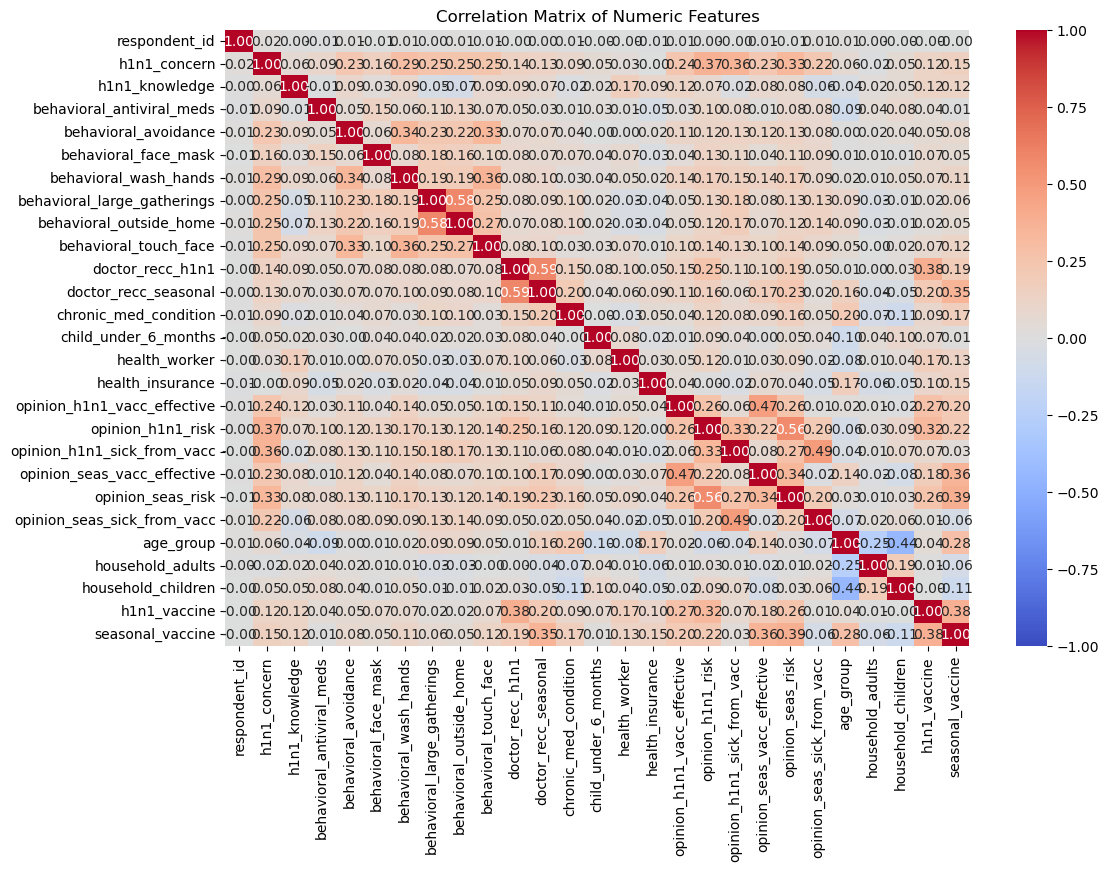

In [732]:
#lets visualize the correlation matrix.
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',fmt='.2f',vmin=-1,vmax=1)
plt.title('Correlation Matrix of Numeric Features')
plt.show()


The colors closer to red indicate a strong positive correlation,while colors closer to blue indicate a strong negative correlation.

Each variable is perfectly correlated to itself hence the diagonal are all 1.0.

strong positive correlation:
'opinion h1n1 risk' & 'opinion h1n1 vacc effective, (0.260) this shows that people who perceive a higher risk of h1n1 may also believe that h1n1 vaccine is effective.

'h1n1 concern' & 'opinion h1n1 risk (0.370) concern about h1n1 is strongly correlated with the perception of risk from h1n1.

'behavioural large gatherings' & 'behavioural outside home'(0.582) These behaviours are highly correlated, meaning people who avoid large gatherings also tend to avoid going outside.

Moderate positive correlation.
'h1n1 concern' & 'behavioural avoidance'(0.232) people who are more concered about h1n1 are more certain to avoid certain behaviours e.g large gathering.

'opinion seas risk' & 'opinion seas vacc effective (0.344) a moderate correlation between the perceived risk of seasonal flu and the belief that seasonal vaccine is effective.

Negative correlation.
'opinion h1n1 sick from vacc' & opinion seas vacc effective(-0.17) very sligh negative correlation indicating a minimal inverse relationship between the two opinions.

In [733]:
#feature engineering.
#interaction
merged_df['concern_knowledge_interaction'] = merged_df['h1n1_concern'] * merged_df['h1n1_knowledge']
#composite varables.
merged_df['h1n1_vaccine_perception'] = (merged_df['opinion_h1n1_risk'] + merged_df['opinion_h1n1_vacc_effective'] - merged_df['opinion_h1n1_sick_from_vacc']) /3
merged_df['behavioral_score'] = (merged_df['behavioral_face_mask'] + merged_df['behavioral_wash_hands'] + merged_df['behavioral_avoidance'])
#ratios or difference.
merged_df['vacc_effectiveness_ratio'] = merged_df['opinion_h1n1_vacc_effective'] / merged_df['opinion_seas_vacc_effective']

Declaring the feature and target variables.

In [734]:
#identify and encode categorical variables.
X= merged_df.drop(columns=['h1n1_vaccine'])
y= merged_df['h1n1_vaccine']


In [735]:
#convert bool into int(0 & 1)
boolean_columns = ['employment_occupation_vlluhbov',
    'employment_occupation_xgwztkwe',
    'employment_occupation_xqwwgdyp',
    'employment_occupation_xtkaffoo',
    'employment_occupation_xzmlyyjv']
merged_df=merged_df.drop(columns=boolean_columns,errors='ignore')

In [736]:
categorical_columns = ['age_group', 'education', 'race', 'sex', 'income_poverty', 
                       'marital_status', 'rent_or_own', 'employment_status', 
                       'hhs_geo_region', 'census_msa', 
                       'employment_industry', 'employment_occupation']

# Perform one-hot encoding
merged_df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Check the data types
print(X.dtypes)

respondent_id                    float64
h1n1_concern                     float64
h1n1_knowledge                   float64
behavioral_antiviral_meds        float64
behavioral_avoidance             float64
behavioral_face_mask             float64
behavioral_wash_hands            float64
behavioral_large_gatherings      float64
behavioral_outside_home          float64
behavioral_touch_face            float64
doctor_recc_h1n1                 float64
doctor_recc_seasonal             float64
chronic_med_condition            float64
child_under_6_months             float64
health_worker                    float64
health_insurance                 float64
opinion_h1n1_vacc_effective      float64
opinion_h1n1_risk                float64
opinion_h1n1_sick_from_vacc      float64
opinion_seas_vacc_effective      float64
opinion_seas_risk                float64
opinion_seas_sick_from_vacc      float64
age_group                        float64
education                         object
race            

In [737]:

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled =scaler.transform(X_test)

model=LogisticRegression()
model.fit(X_train_scaled,y_train)

y_pred=model.predict(X_test_scaled)

ValueError: could not convert string to float: 'Some College'

In [ ]:
#Evaluate the model
y_pred=model.predict(X_test_scaled)

accuracy = accuracy_score(y_test,y_pred)

conf_matrix= confusion_matrix(y_test,y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.85
Confusion Matrix:
 [[3723  260]
 [ 528  587]]


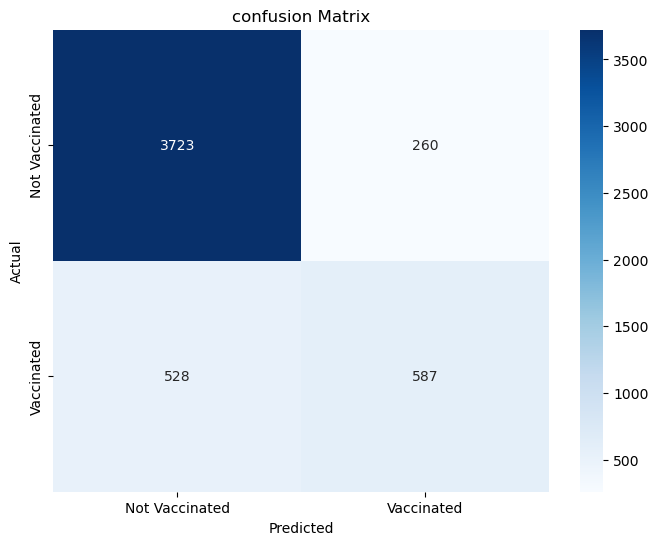

In [ ]:
#plotting confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix,annot=True,fmt='d',cmap='Blues',xticklabels=['Not Vaccinated','Vaccinated'],yticklabels=['Not Vaccinated','Vaccinated'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('confusion Matrix')
plt.show()


The model correctly predicts the target variable 85% of time.
True negatives:3723 
False positives:260
False Negative: 528
True Positives:587


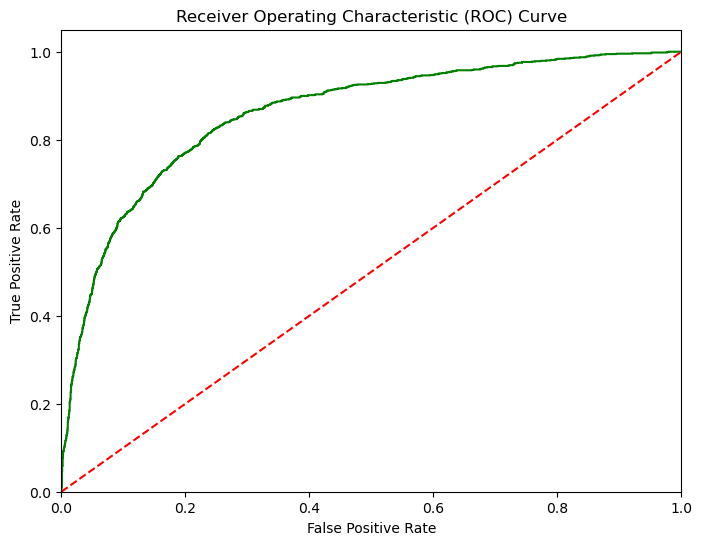

In [ ]:
#plot ROC curve
y_score= model.predict_proba(X_test_scaled)[:,1]

fpr,tpr ,thresholds = roc_curve(y_test,y_score)

roc_auc=auc(fpr,tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr,tpr,color='green',label='ROC CURVE(area={:.2f})'.format(roc_auc))
plt.plot([0,1],[0,1],color='red',linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.show()

the Roc suggests that the model performs well as the curve is well above the diagonal line with a good balance between the TPR & FPR

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.88      0.93      0.90      3983
         1.0       0.69      0.53      0.60      1115

    accuracy                           0.85      5098
   macro avg       0.78      0.73      0.75      5098
weighted avg       0.84      0.85      0.84      5098



In [ ]:
#K fold cross validation
cv_scores=cross_val_score(model,X_train_scaled,y_train,cv=5,scoring='accuracy' )
cv_scores

ValueError: Found input variables with inconsistent numbers of samples: [20388, 21365]